In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
ImportWarning
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold ,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [88]:
data = pd.read_csv(r'/content/train_u6lujuX_CVtuZ9i (1).csv')

In [89]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
data.shape

(614, 13)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [94]:
data.duplicated().sum()

np.int64(0)

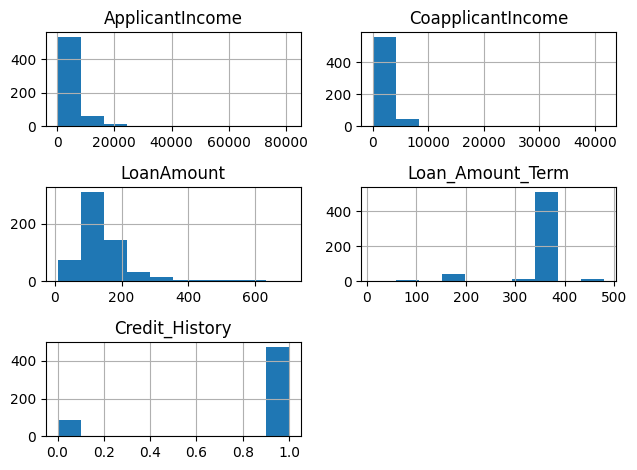

In [95]:
data.hist()
plt.tight_layout()


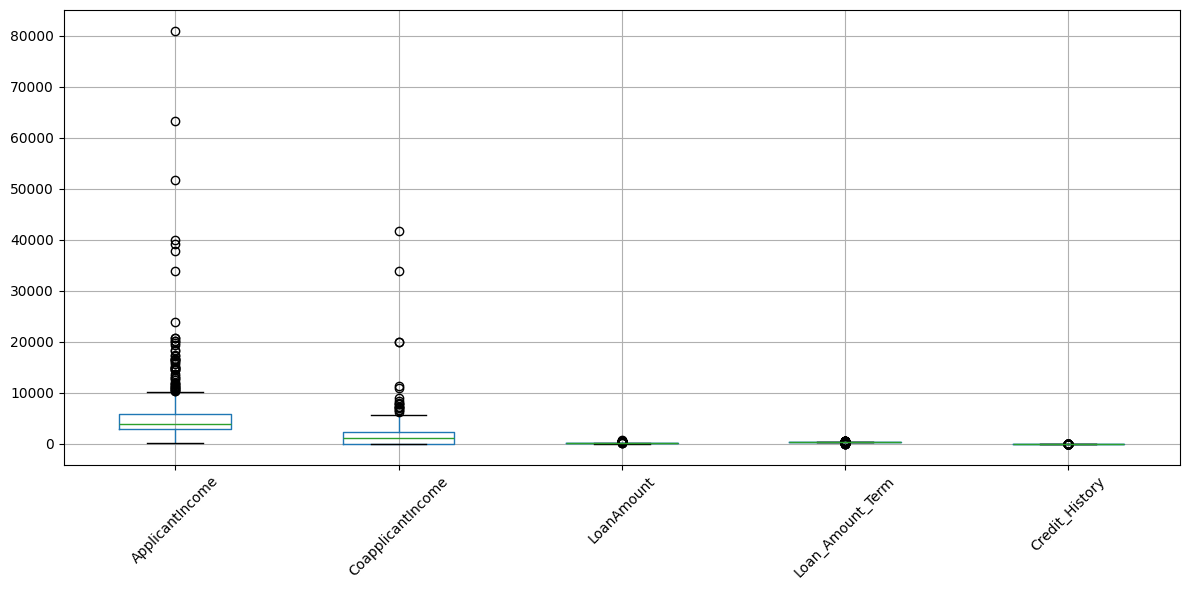

In [96]:
data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()

In [97]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [98]:
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()} null values")

Loan_ID: 0 null values
Gender: 0 null values
Married: 0 null values
Dependents: 0 null values
Education: 0 null values
Self_Employed: 0 null values
ApplicantIncome: 0 null values
CoapplicantIncome: 0 null values
LoanAmount: 0 null values
Loan_Amount_Term: 0 null values
Credit_History: 0 null values
Property_Area: 0 null values
Loan_Status: 0 null values


In [99]:
selected_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [100]:
for col in selected_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Records before handling outliers in {col}: {len(data)}")
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    print(f"{col}: {len(data)} records after removing outliers")

Records before handling outliers in ApplicantIncome: 614
ApplicantIncome: 50 outliers
ApplicantIncome: 564 records after removing outliers
Records before handling outliers in CoapplicantIncome: 564
CoapplicantIncome: 16 outliers
CoapplicantIncome: 548 records after removing outliers
Records before handling outliers in LoanAmount: 548
LoanAmount: 28 outliers
LoanAmount: 520 records after removing outliers
Records before handling outliers in Loan_Amount_Term: 520
Loan_Amount_Term: 75 outliers
Loan_Amount_Term: 445 records after removing outliers


In [101]:
len(data)

445

In [102]:
data.drop('Loan_ID', axis=1, inplace=True)

In [103]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 'Accepted', 'N': 'Rejected'})

In [104]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Accepted,317
Rejected,128


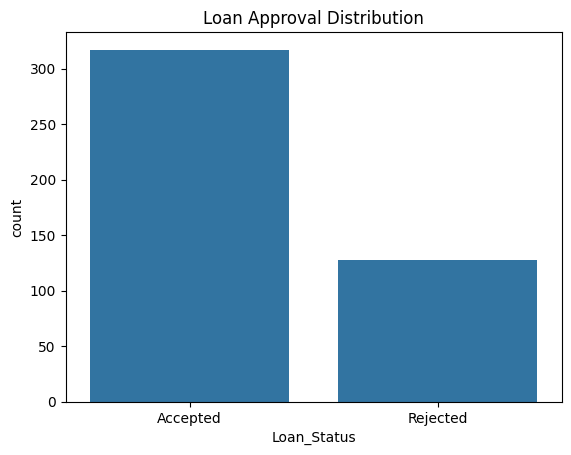

In [105]:
sns.countplot(x='Loan_Status', data=data)
plt.title("Loan Approval Distribution")
plt.show()

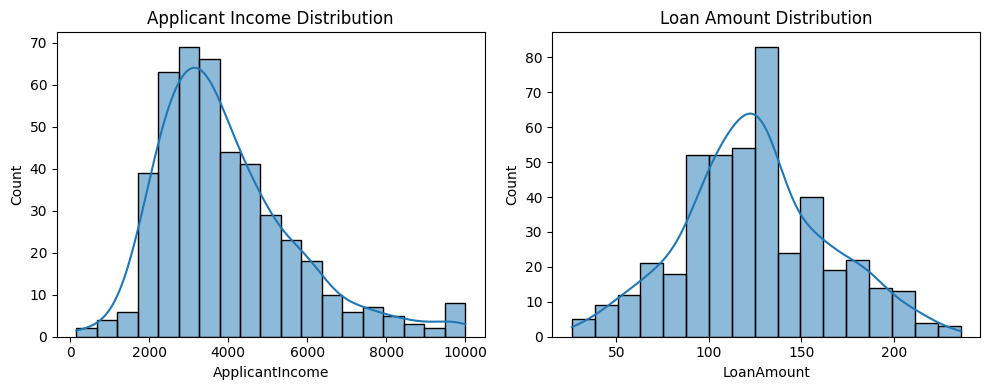

In [106]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Numerical Features after Outlier Removal')

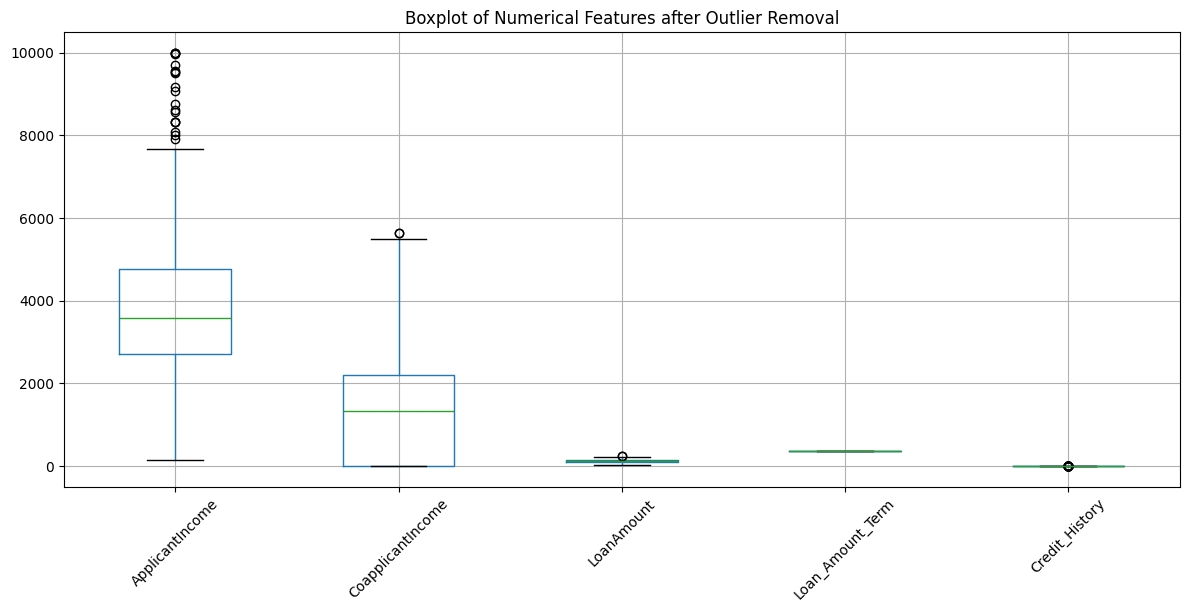

In [107]:
data.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Boxplot of Numerical Features after Outlier Removal")

Text(0.5, 1.0, 'Histograms of Numerical Features after Outlier Removal')

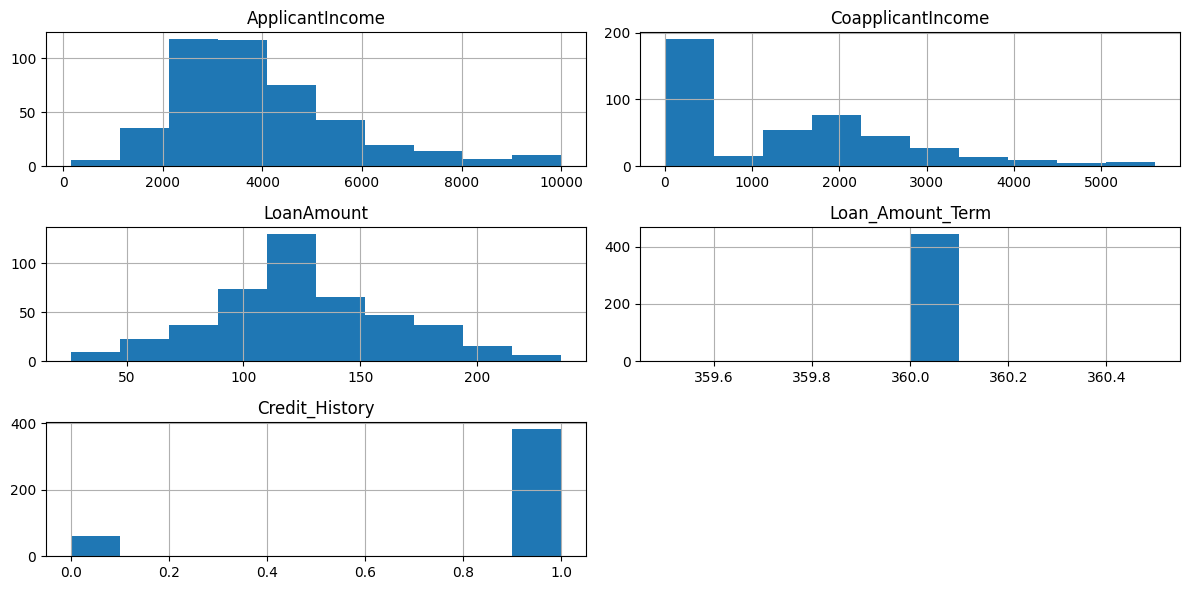

In [108]:
data.hist(figsize=(12, 6))
plt.tight_layout()
plt.title("Histograms of Numerical Features after Outlier Removal")


Text(0.5, 1.0, 'Correlation Heatmap')

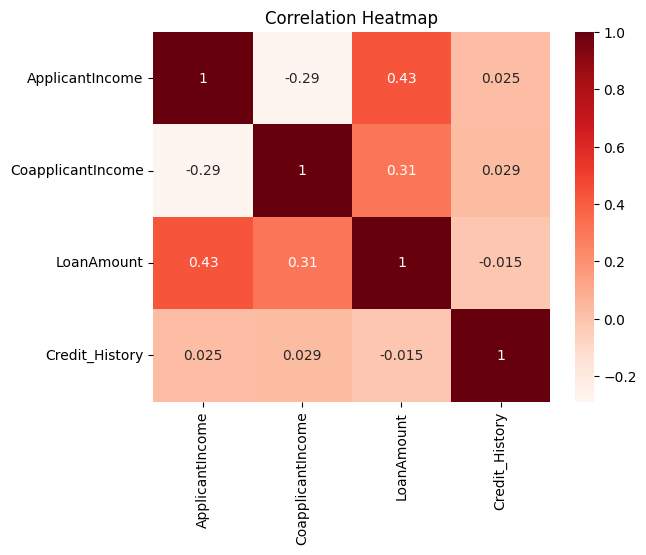

In [109]:
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Loan_Amount_Term', errors='ignore')
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='Reds')
plt.title("Correlation Heatmap")

In [110]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
data['Income_Loan_Ratio'] = data['Total_Income'] / data['LoanAmount']

Text(0.5, 1.0, 'Correlation Heatmap')

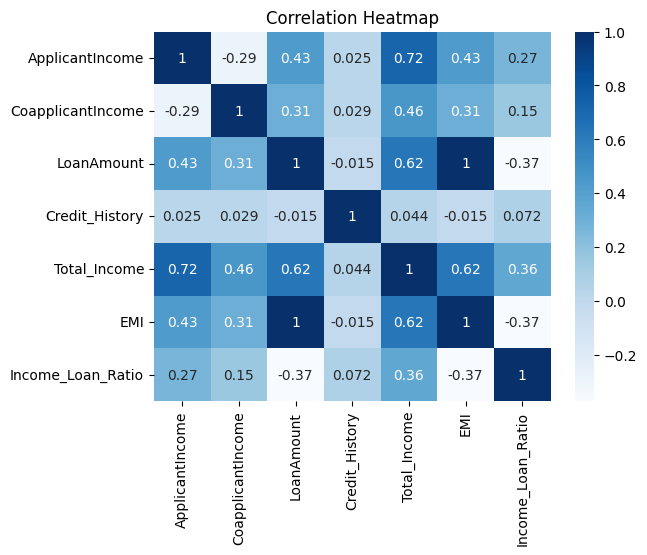

In [111]:
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Loan_Amount_Term', errors='ignore')
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")

In [112]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [114]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'EMI',
       'Income_Loan_Ratio'],
      dtype='object')
Categorical Features: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [115]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [116]:
result = {}
Accuracy = {}
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5
                                            ,class_weight='balanced',
                                            random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        max_depth=6,
        random_state=42
    ),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "XGBClassifier": XGBClassifier(random_state=42,
                                   eval_metric='logloss'),
    "SVC": SVC(random_state=42 ,kernel="rbf")
}


In [117]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [118]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

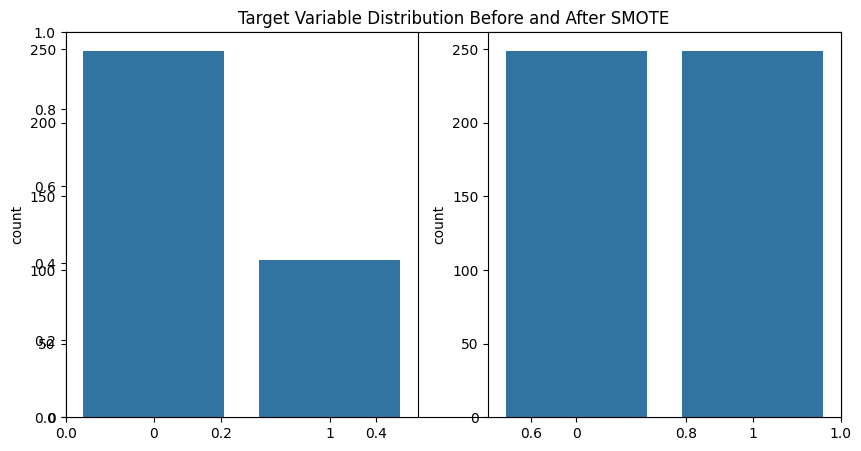

In [119]:
plt.figure(figsize=(10, 5))
plt.title("Target Variable Distribution Before and After SMOTE")
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.show()

In [121]:
for name, model in models.items():
    model_trained = Pipeline(steps=[
        ('classifier', model)
    ])

    model_trained.fit(x_train_smote, y_train_smote)

    y_pred = model_trained.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    Accuracy[name] = accuracy
    result[name] = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.7528089887640449
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        68
           1       0.48      0.62      0.54        21

    accuracy                           0.75        89
   macro avg       0.68      0.71      0.69        89
weighted avg       0.78      0.75      0.76        89

--------------------------------------------------
Decision Tree Accuracy: 0.7303370786516854
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        68
           1       0.43      0.48      0.45        21

    accuracy                           0.73        89
   macro avg       0.63      0.64      0.64        89
weighted avg       0.74      0.73      0.73        89

--------------------------------------------------
Random Forest Accuracy: 0.8539325842696629
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        68


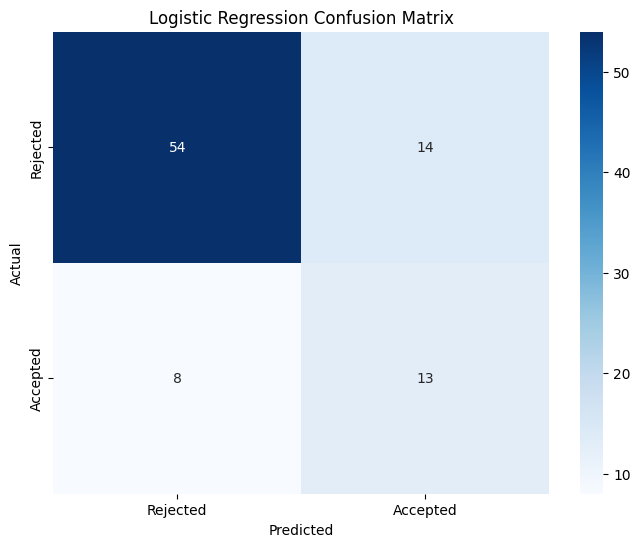

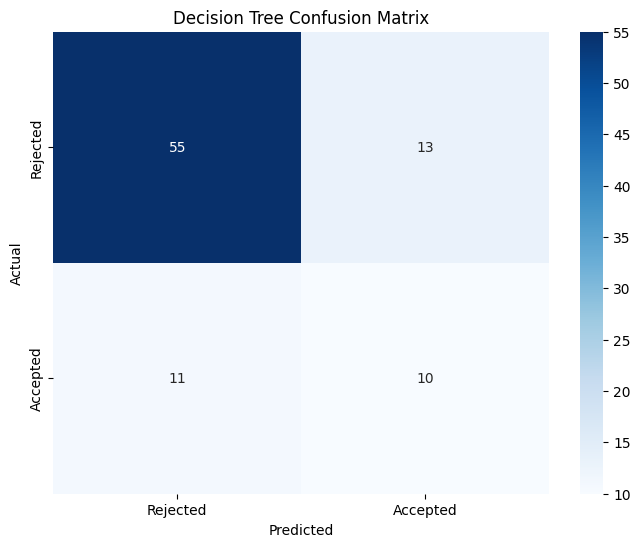

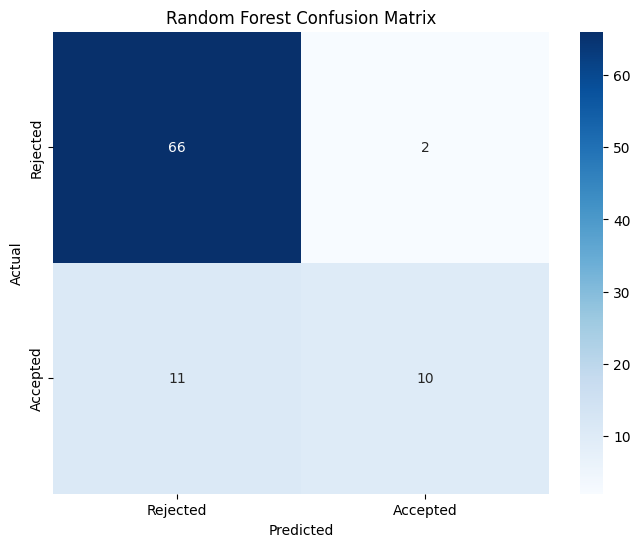

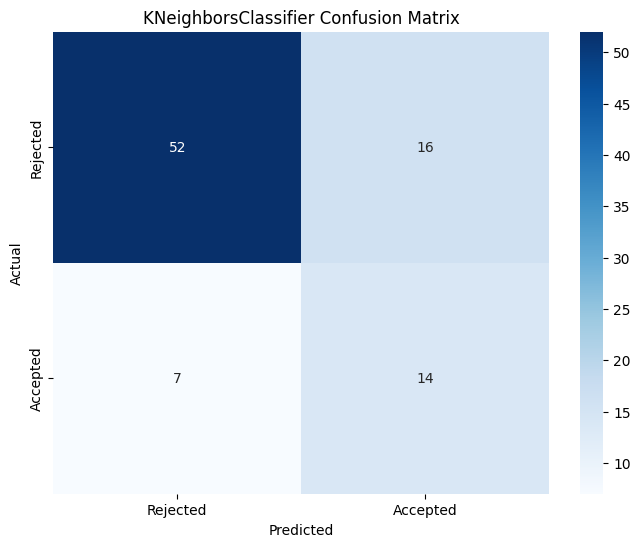

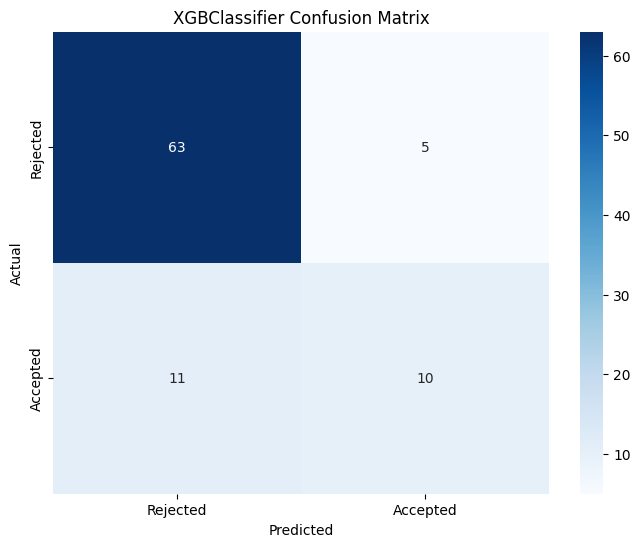

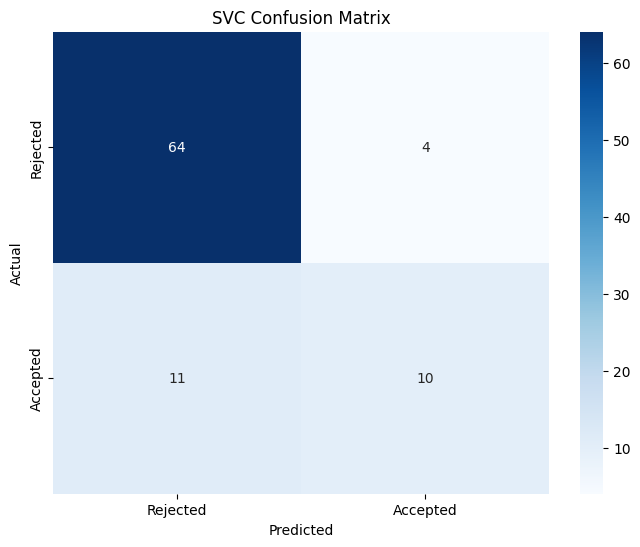

In [124]:
for name, model in models.items():
    model_trained = Pipeline(steps=[
        ('classifier', model)
    ])
    model_trained.fit(x_train_smote, y_train_smote)
    y_pred = model_trained.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [125]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [127]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grids = {
    'Random Forest': param_grid_rf,
    'XGBClassifier': param_grid_xgb,
    'Logistic Regression': param_grid_lr,
    'Decision Tree': param_grid_dt,
    'KNeighborsClassifier': param_grid_knn,
    'SVC': param_grid_svc
}

best_models = {}

for name, param_grid in param_grids.items():
    print(f"Tuning {name}...")
    model_instance = None
    if name == 'Random Forest':
        model_instance = RandomForestClassifier(random_state=42)
    elif name == 'XGBClassifier':
        model_instance = XGBClassifier(random_state=42, eval_metric='logloss')
    elif name == 'Logistic Regression':
        model_instance = LogisticRegression(random_state=42)
    elif name == 'Decision Tree':
        model_instance = DecisionTreeClassifier(random_state=42)
    elif name == 'KNeighborsClassifier':
        model_instance = KNeighborsClassifier()
    elif name == 'SVC':
        model_instance = SVC(random_state=42)

    grid_search = GridSearchCV(estimator=model_instance, param_grid=param_grid, cv=CV, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(x_train_smote, y_train_smote)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    best_models[name] = grid_search.best_estimator_
    print("-" * 50)


Tuning Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8636
--------------------------------------------------
Tuning XGBClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy for XGBClassifier: 0.8496
--------------------------------------------------
Tuning Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.7169
--------------------------------------------------
Tuning Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best param

In [128]:
tuned_model_accuracy = {}

for name, best_model in best_models.items():
    print(f"Evaluating tuned {name} on the test set...")
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    tuned_model_accuracy[name] = accuracy

    print(f"Tuned {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Evaluating tuned Random Forest on the test set...
Tuned Random Forest Accuracy: 0.8315
              precision    recall  f1-score   support

           0       0.85      0.94      0.90        68
           1       0.71      0.48      0.57        21

    accuracy                           0.83        89
   macro avg       0.78      0.71      0.73        89
weighted avg       0.82      0.83      0.82        89

--------------------------------------------------
Evaluating tuned XGBClassifier on the test set...
Tuned XGBClassifier Accuracy: 0.8427
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.77      0.48      0.59        21

    accuracy                           0.84        89
   macro avg       0.81      0.72      0.75        89
weighted avg       0.83      0.84      0.83        89

--------------------------------------------------
Evaluating tuned Logistic Regression on the test set...
Tuned Logistic